In [146]:
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from dmba import regressionSummary
# from dmba import classificationSummar
import statsmodels.api as sm
import matplotlib.pylab as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.exceptions import DataConversionWarning



In [147]:
SalesOfMedicalDevices = "C:\\Users\\ajaal\\Downloads\\SalesOfMedicalDevices.xlsx"
SalesOfMedicalDevices = pd.read_excel(SalesOfMedicalDevices)
SalesOfMedicalDevices.head(3)


,Customer,year,NoOfSalesCalls,NoOfTargetedEmails,NoOfSales,CustomerSatisfaction
0,1,2009,1,2,3,-1
1,1,2010,1,1,3,-1
2,1,2011,1,2,0,1


In [148]:
SalesOfMedicalDevices_columns = ['NoOfSalesCalls', 'NoOfTargetedEmails', 'NoOfSales', 'CustomerSatisfaction']

SalesOfMedicalDevices[SalesOfMedicalDevices_columns].describe()



,NoOfSalesCalls,NoOfTargetedEmails,NoOfSales,CustomerSatisfaction
count,611.000000,611.000000,611.000000,611.000000
mean,1.415712,1.543372,1.392799,-0.121113
std,1.318475,1.136287,1.331663,0.738893
min,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,1.000000,0.000000,-1.000000
50%,1.000000,2.000000,1.000000,0.000000
75%,3.000000,3.000000,3.000000,0.000000
max,5.000000,3.000000,4.000000,1.000000


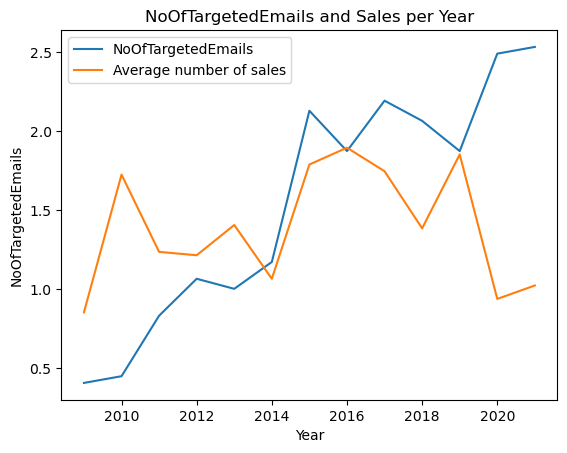

In [149]:

grouped_data = SalesOfMedicalDevices.groupby('year').agg({'NoOfTargetedEmails': 'mean', 'NoOfSales': 'mean'})
plt.plot(grouped_data['NoOfTargetedEmails'], label='NoOfTargetedEmails')
plt.plot(grouped_data['NoOfSales'], label='Average number of sales')
plt.legend()
plt.xlabel('Year')
plt.ylabel('NoOfTargetedEmails')
plt.title('NoOfTargetedEmails and Sales per Year')
plt.show()

In [150]:
SalesOfMedicalDevices.columns

Index(['Customer', 'year', 'NoOfSalesCalls', 'NoOfTargetedEmails', 'NoOfSales',
       'CustomerSatisfaction'],
      dtype='object')

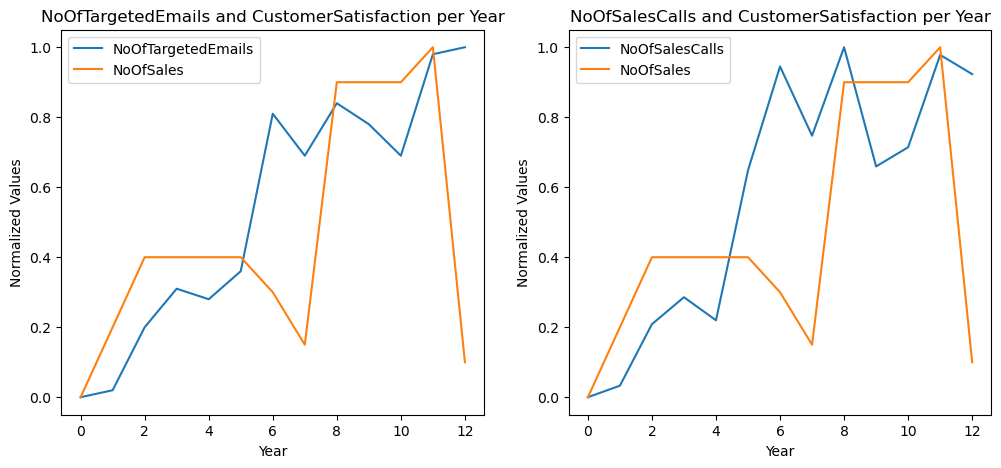

In [151]:
SalesOfMedicalDevices = "C:\\Users\\ajaal\\Downloads\\SalesOfMedicalDevices.xlsx"
SalesOfMedicalDevices = pd.read_excel(SalesOfMedicalDevices)
grouped_data = SalesOfMedicalDevices.groupby('year').agg({'NoOfTargetedEmails': 'mean', 'NoOfSalesCalls': 'mean', 'CustomerSatisfaction': 'mean'})
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(grouped_data)
normalized_df = pd.DataFrame(normalized_data, columns=['NoOfTargetedEmails', 'NoOfSalesCalls', 'NoOfSales'])
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(normalized_df['NoOfTargetedEmails'], label='NoOfTargetedEmails')
axs[0].plot(normalized_df['NoOfSales'], label='NoOfSales')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Normalized Values')
axs[0].set_title('NoOfTargetedEmails and CustomerSatisfaction per Year')
axs[0].legend()
axs[1].plot(normalized_df['NoOfSalesCalls'], label='NoOfSalesCalls')
axs[1].plot(normalized_df['NoOfSales'], label='NoOfSales')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Normalized Values')
axs[1].set_title('NoOfSalesCalls and CustomerSatisfaction per Year')
axs[1].legend()
plt.show()

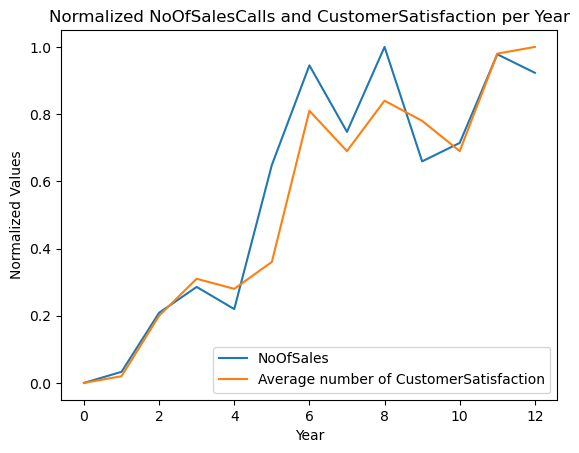

In [152]:
SalesOfMedicalDevices = "C:\\Users\\ajaal\\Downloads\\SalesOfMedicalDevices.xlsx"
SalesOfMedicalDevices = pd.read_excel(SalesOfMedicalDevices)
grouped_data = SalesOfMedicalDevices.groupby('year').agg({'CustomerSatisfaction': 'mean','NoOfTargetedEmails': 'mean', 'NoOfSales': 'mean','NoOfSalesCalls': 'mean'})
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(grouped_data)
normalized_df = pd.DataFrame(normalized_data, columns=['NoOfTargetedEmails', 'CustomerSatisfaction','NoOfSalesCalls','NoOfSales'])
plt.plot(normalized_df['NoOfSales'], label='NoOfSales')
plt.plot(normalized_df['CustomerSatisfaction'], label='Average number of CustomerSatisfaction')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Normalized Values')
plt.title('Normalized NoOfSalesCalls and CustomerSatisfaction per Year')
plt.show()

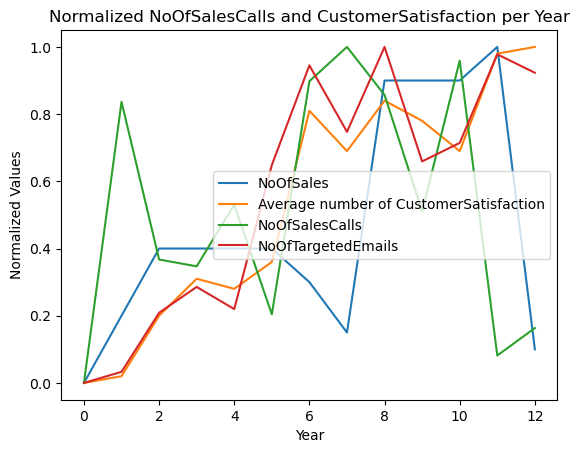

In [153]:
grouped_data = SalesOfMedicalDevices.groupby('year').agg({'CustomerSatisfaction': 'mean','NoOfTargetedEmails': 'mean', 'NoOfSales': 'mean','NoOfSalesCalls': 'mean'})
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(grouped_data)
normalized_df = pd.DataFrame(normalized_data, columns=['NoOfSales', 'CustomerSatisfaction','NoOfSalesCalls','NoOfTargetedEmails'])
plt.plot(normalized_df['NoOfSales'], label='NoOfSales')
plt.plot(normalized_df['CustomerSatisfaction'], label='Average number of CustomerSatisfaction')
plt.plot(normalized_df['NoOfSalesCalls'], label='NoOfSalesCalls')
plt.plot(normalized_df['NoOfTargetedEmails'], label='NoOfTargetedEmails')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Normalized Values')
plt.title('Normalized NoOfSalesCalls and CustomerSatisfaction per Year')
plt.show()

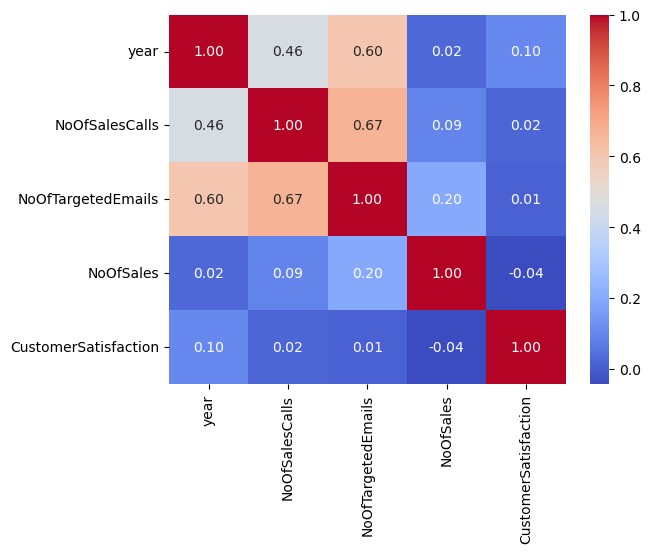

In [154]:
scaler = StandardScaler()
Numerical_columns = ['year', 'NoOfSalesCalls', 'NoOfTargetedEmails', 'NoOfSales', 'CustomerSatisfaction']
scaler = StandardScaler()
SalesOfMedicalDevices[Numerical_columns] = scaler.fit_transform(SalesOfMedicalDevices[Numerical_columns])
corr_matrix = SalesOfMedicalDevices[Numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

                            OLS Regression Results                            
Dep. Variable:              NoOfSales   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.490
Date:                Thu, 04 May 2023   Prob (F-statistic):             0.0195
Time:                        13:13:24   Log-Likelihood:                -1038.7
No. Observations:                 611   AIC:                             2081.
Df Residuals:                     609   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.2577      0.079     15.

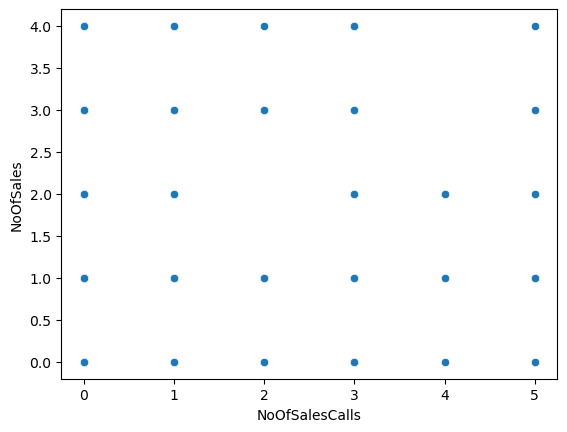

In [155]:
SalesOfMedicalDevices = "C:\\Users\\ajaal\\Downloads\\SalesOfMedicalDevices.xlsx"
SalesOfMedicalDevices = pd.read_excel(SalesOfMedicalDevices)
sns.scatterplot(data=SalesOfMedicalDevices, x='NoOfSalesCalls', y='NoOfSales')
model1 = smf.ols('NoOfSales ~ NoOfSalesCalls', data=SalesOfMedicalDevices).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:              NoOfSales   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     24.80
Date:                Thu, 04 May 2023   Prob (F-statistic):           8.29e-07
Time:                        13:13:25   Log-Likelihood:                -1029.3
No. Observations:                 611   AIC:                             2063.
Df Residuals:                     609   BIC:                             2071.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.0350      0

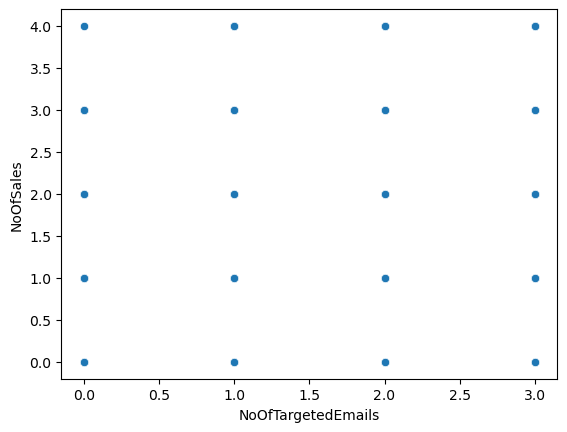

In [156]:
SalesOfMedicalDevices = "C:\\Users\\ajaal\\Downloads\\SalesOfMedicalDevices.xlsx"
SalesOfMedicalDevices = pd.read_excel(SalesOfMedicalDevices)
sns.scatterplot(data=SalesOfMedicalDevices, x='NoOfTargetedEmails', y='NoOfSales')
model2 = smf.ols('NoOfSales ~ NoOfTargetedEmails', data=SalesOfMedicalDevices).fit()
print(model2.summary())

In [157]:
SalesOfMedicalDevices['CustomerSatisfaction'].unique ()

array([-1,  1,  0], dtype=int64)

Explained variance ratio: [0.54587843 0.24781232 0.13543114 0.07087812]
Loadings for PC1:
year 0.5314438156630984
NoOfSalesCalls 0.5623988598660977
NoOfTargetedEmails 0.6133500943718103
NoOfSales 0.15835610171020156
Loadings for PC2:
year -0.23311476203433135
NoOfSalesCalls -0.07746145733376314
NoOfTargetedEmails 0.02280947606029545
NoOfSales 0.9690907894264922


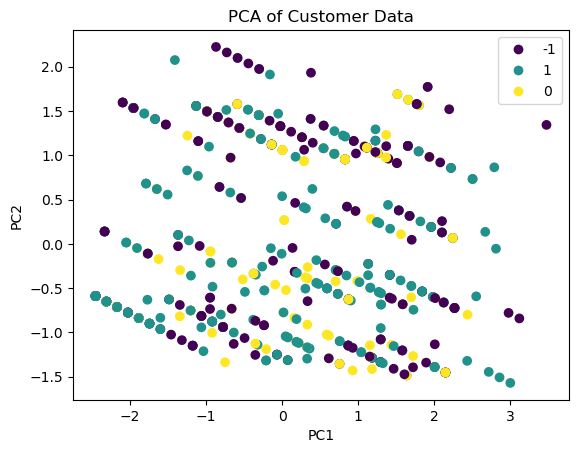

In [158]:
X = SalesOfMedicalDevices[['year', 'NoOfSalesCalls', 'NoOfTargetedEmails','NoOfSales']]
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
pca = PCA()
pca.fit(X_std)
print("Explained variance ratio:", pca.explained_variance_ratio_)
loadings = pca.components_
print("Loadings for PC1:")
for i in range(len(X.columns)):
    print(X.columns[i], loadings[0][i])
    
print("Loadings for PC2:")
for i in range(len(X.columns)):
    print(X.columns[i], loadings[1][i])
transformed_data = pca.transform(X_std)
plot = plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=SalesOfMedicalDevices['CustomerSatisfaction'])
plot = plt.legend(handles=plot.legend_elements()[0], labels=list(SalesOfMedicalDevices['CustomerSatisfaction'].unique()))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Customer Data')
plt.show()

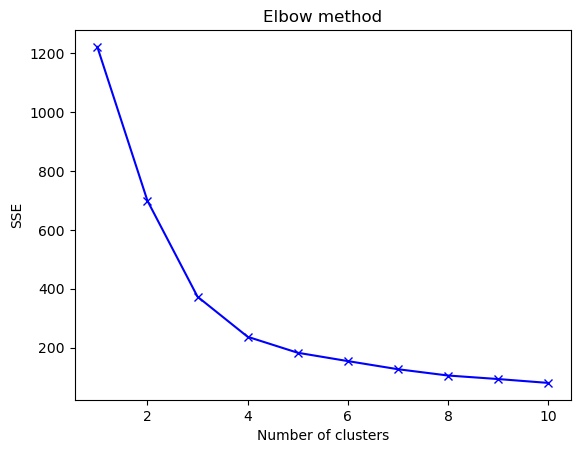

Cluster 0: 206 customers
     Customer  year  NoOfSalesCalls  NoOfTargetedEmails  NoOfSales  \
2   -1.695582  2011               1                   2  -1.046767   
3   -1.695582  2012               3                   2  -1.046767   
5   -1.695582  2014               3                   2  -1.046767   
9   -1.695582  2018               1                   3  -1.046767   
11  -1.695582  2020               1                   1  -1.046767   
..        ...   ...             ...                 ...        ...   
315  0.073721  2012               0                   0  -1.046767   
317  0.073721  2014               1                   1  -1.046767   
321  0.073721  2018               3                   2  -1.046767   
323  0.073721  2020               3                   3  -1.046767   
324  0.073721  2021               3                   3  -1.046767   

     CustomerSatisfaction  (NoOfSales, Customer)  
2                       1                      0  
3                       1       

In [159]:
from sklearn.cluster import KMeans
SalesOfMedicalDevices = "C:\\Users\\ajaal\\Downloads\\SalesOfMedicalDevices.xlsx"
SalesOfMedicalDevices = pd.read_excel(SalesOfMedicalDevices)
scaler = StandardScaler()
numerical_cols = ['NoOfSales','Customer']
SalesOfMedicalDevices[numerical_cols] = scaler.fit_transform(SalesOfMedicalDevices[numerical_cols])
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(SalesOfMedicalDevices[numerical_cols])
    sse.append(kmeans.inertia_)

plt.plot(k_range, sse, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow method')
plt.show()

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(SalesOfMedicalDevices[numerical_cols])
SalesOfMedicalDevices['NoOfSales','Customer'] = kmeans.labels_
for i in range(k):
    cluster = SalesOfMedicalDevices[SalesOfMedicalDevices['NoOfSales','Customer'] == i]
    print("Cluster {}: {} customers".format(i, len(cluster)))
    print(cluster)



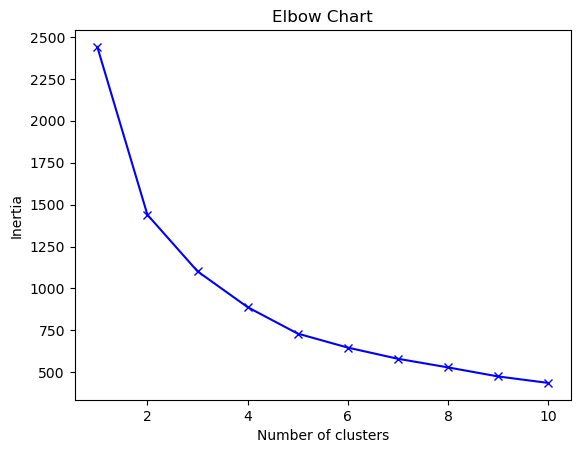

Cluster 0 (194 members): 243.35 within cluster
Cluster 1 (231 members): 496.70 within cluster
Cluster 2 (186 members): 361.91 within cluster


In [160]:
X = SalesOfMedicalDevices[['year', 'NoOfSalesCalls', 'NoOfTargetedEmails','NoOfSales']]
X_norm = (X - X.mean()) / X.std()
inertias = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_norm)
    inertias.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertias, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Chart')
plt.show()
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_norm)
distances = kmeans.transform(X_norm)
min_squared_distances = distances.min(axis=1) ** 2
df = pd.DataFrame({'squaredDistance': min_squared_distances, 'cluster': kmeans.labels_}, index=SalesOfMedicalDevices.index)
for cluster, data in df.groupby('cluster'):
    count = len(data)
    within_clust_SS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {within_clust_SS:.2f} within cluster')


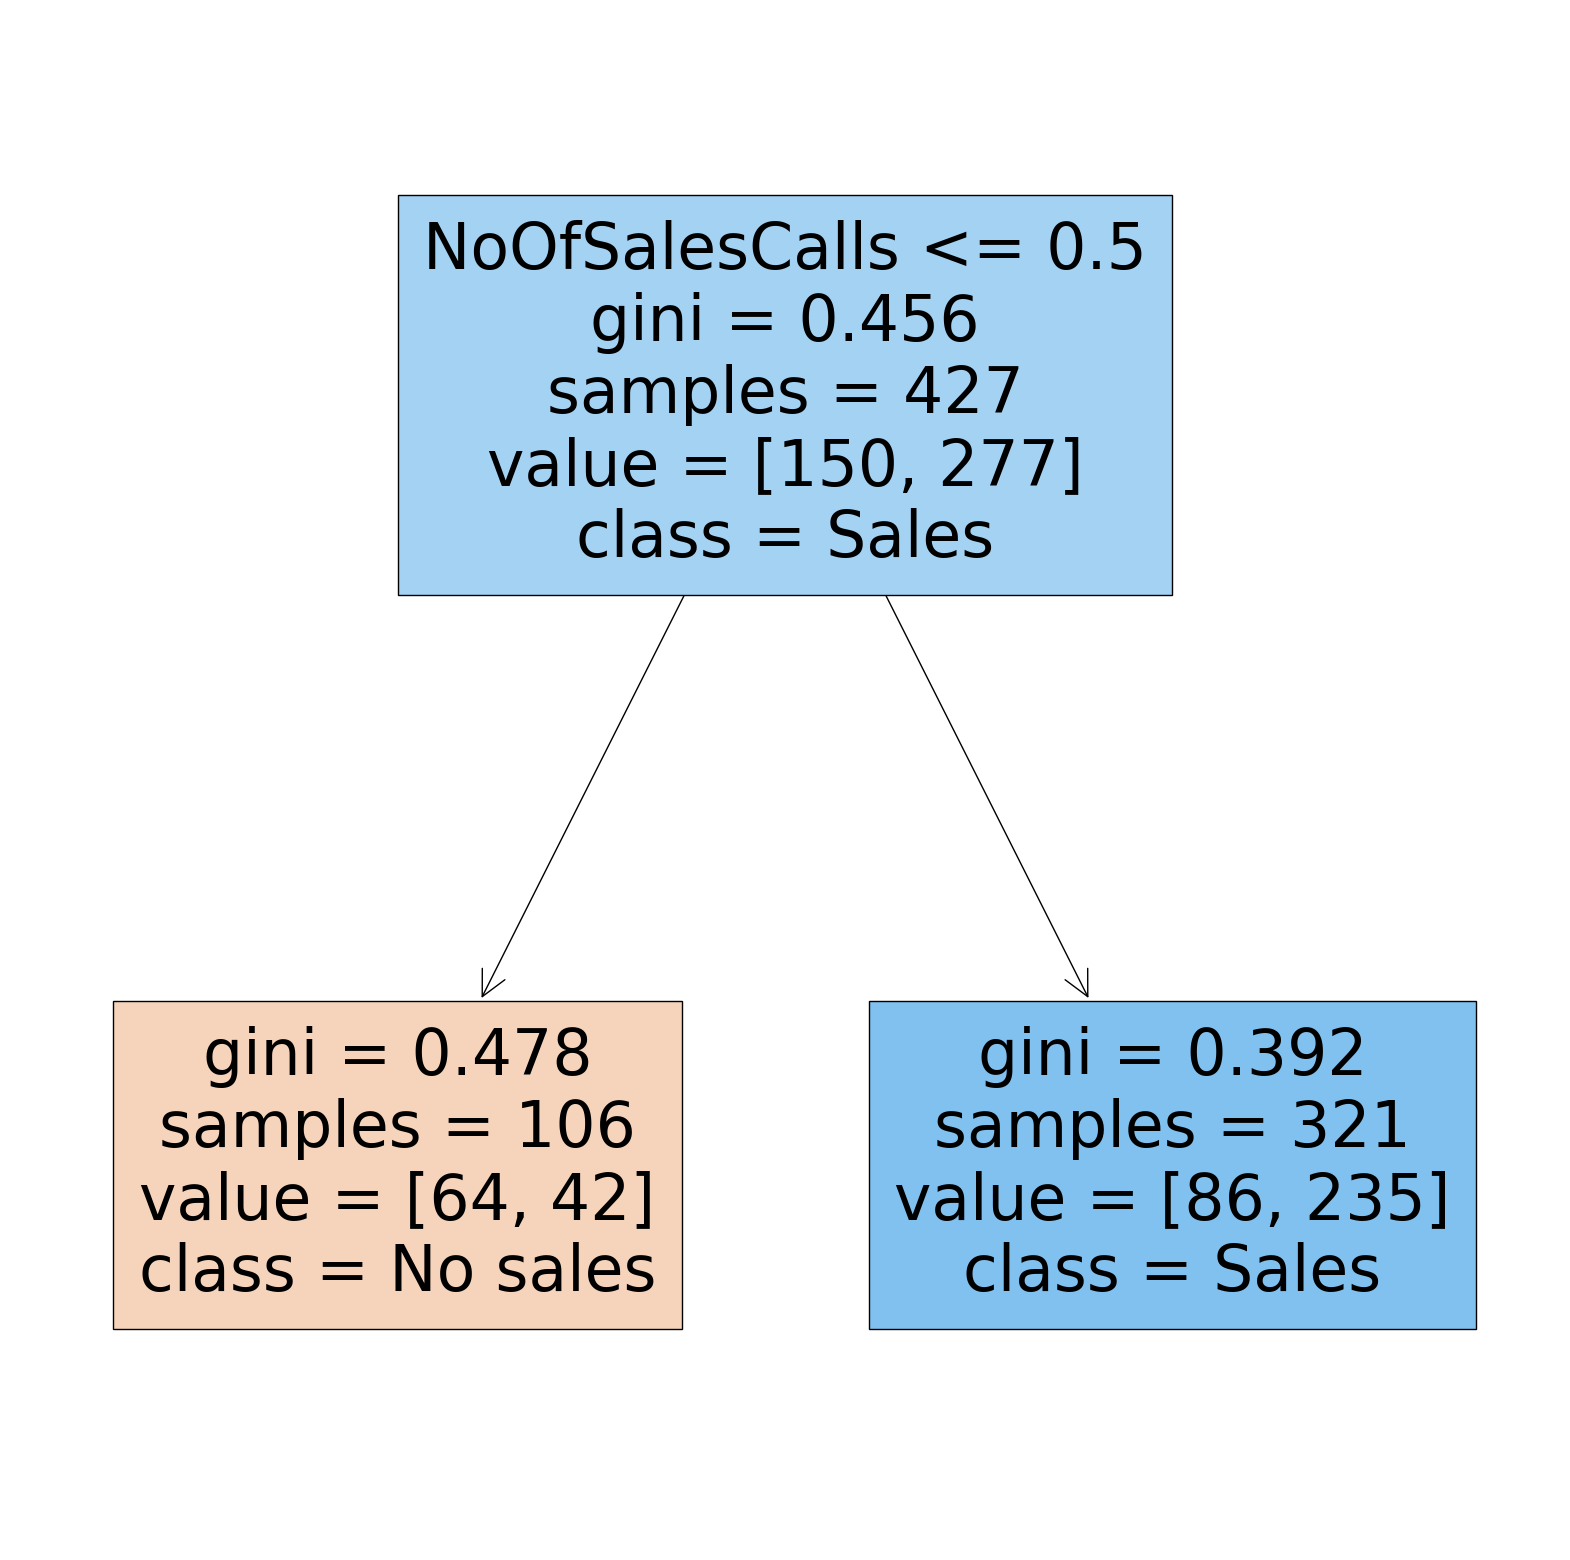

Accuracy: 0.6739130434782609
Precision: 0.6859504132231405
Recall: 0.7904761904761904
F1 score: 0.7345132743362831


In [161]:
SalesOfMedicalDevices = "C:\\Users\\ajaal\\Downloads\\SalesOfMedicalDevices.xlsx"
SalesOfMedicalDevices = pd.read_excel(SalesOfMedicalDevices)
SalesOfMedicalDevices = SalesOfMedicalDevices.drop('Customer', axis=1) 
SalesOfMedicalDevices = SalesOfMedicalDevices.dropna()
X = SalesOfMedicalDevices.drop('NoOfSales', axis=1) 
y = SalesOfMedicalDevices['NoOfSales'] > 0 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = DecisionTreeClassifier(max_depth=5, min_samples_split=50, min_impurity_decrease=0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
class_names = ['No sales', 'Sales']
fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(model, feature_names=X.columns, class_names=class_names, filled=True, ax=ax)
plt.show()
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

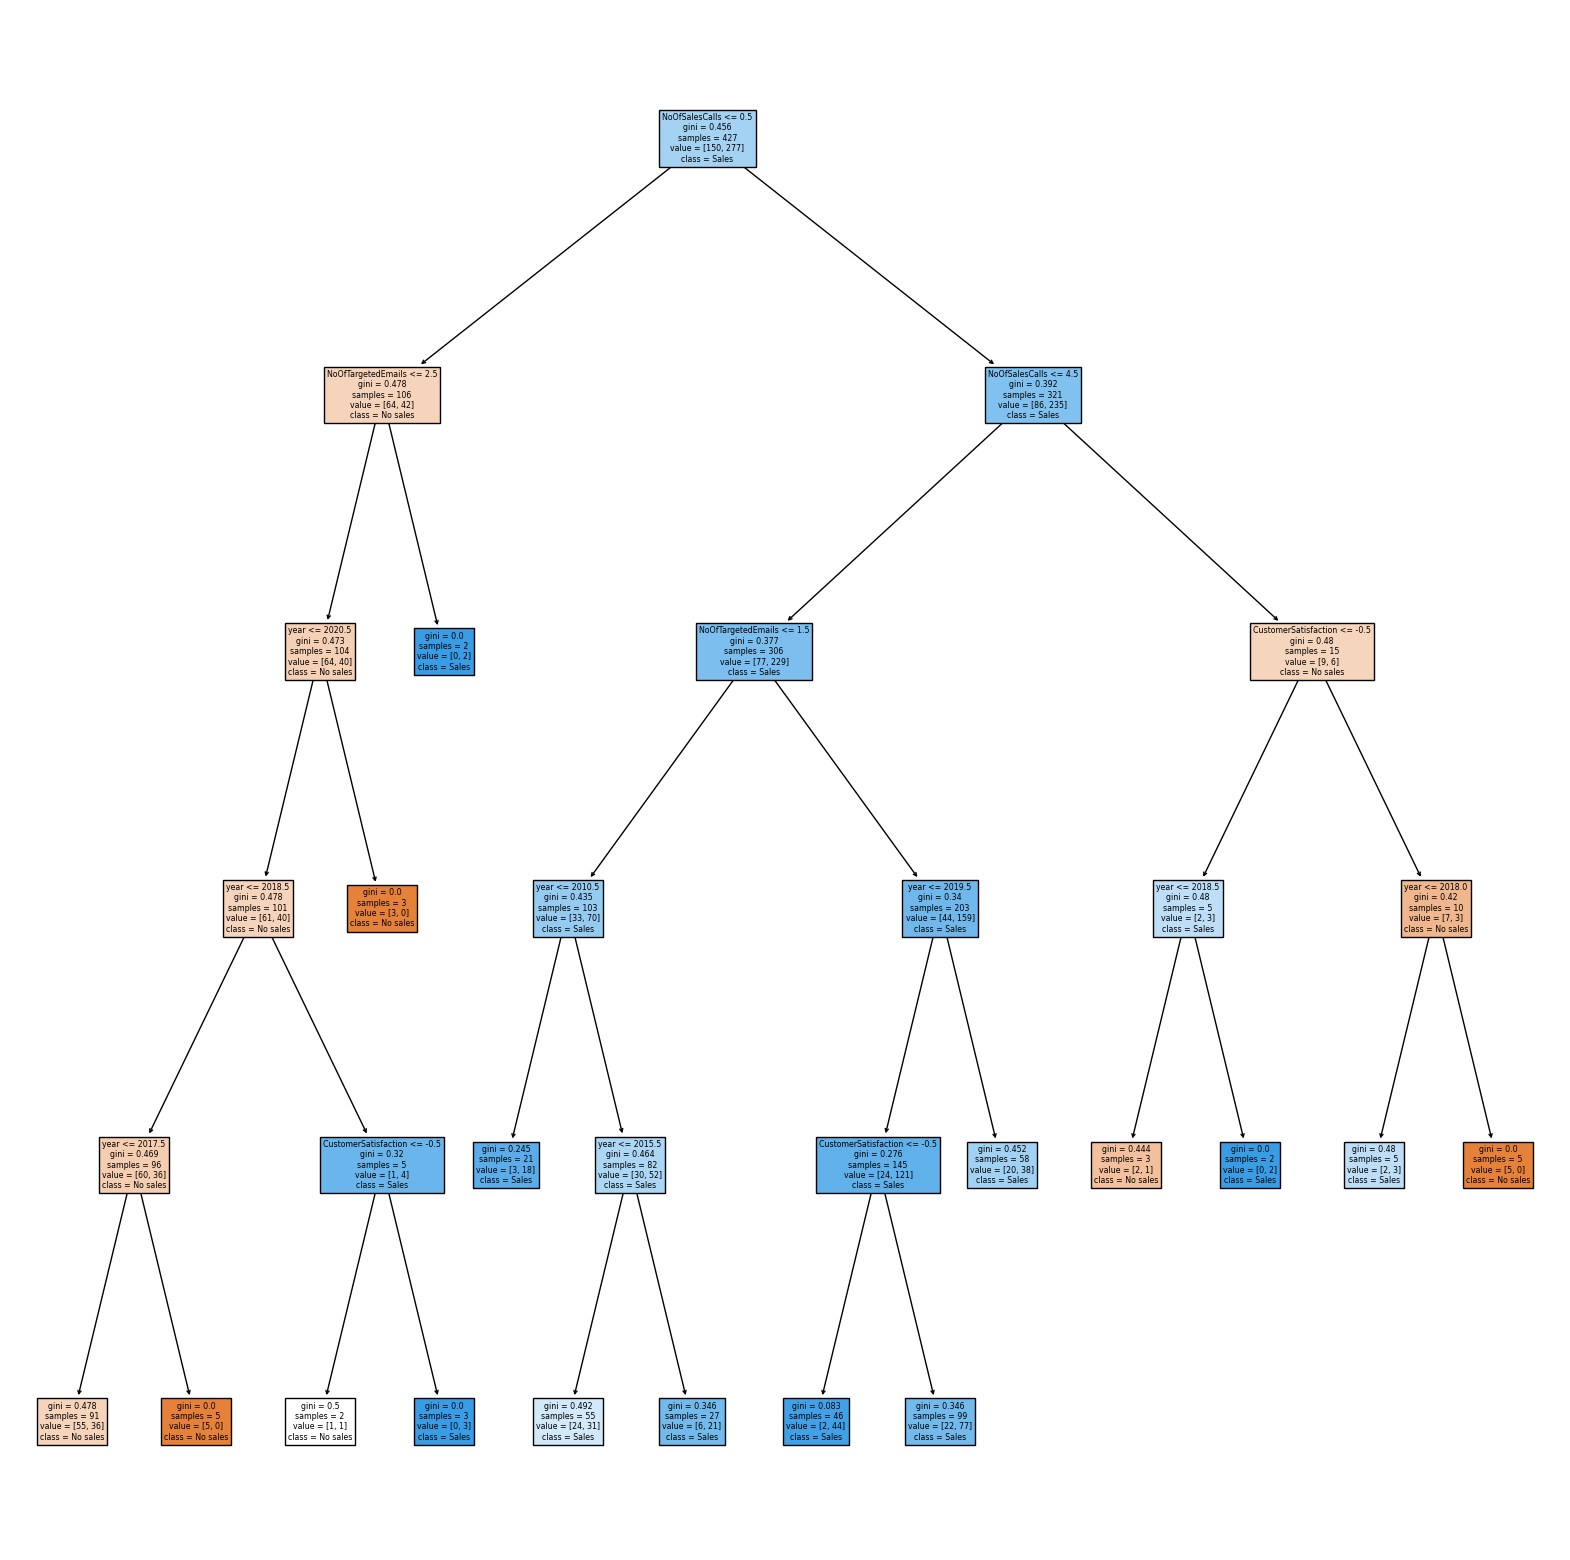

Accuracy: 0.6902173913043478
Precision: 0.6935483870967742
Recall: 0.819047619047619
F1 score: 0.7510917030567685


In [162]:
SalesOfMedicalDevices = "C:\\Users\\ajaal\\Downloads\\SalesOfMedicalDevices.xlsx"
SalesOfMedicalDevices = pd.read_excel(SalesOfMedicalDevices)
SalesOfMedicalDevices = SalesOfMedicalDevices.drop('Customer', axis=1) 
SalesOfMedicalDevices = SalesOfMedicalDevices.dropna()
X = SalesOfMedicalDevices.drop('NoOfSales', axis=1) 
y = SalesOfMedicalDevices['NoOfSales'] > 0 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = DecisionTreeClassifier(max_depth=5, min_samples_split=3, min_impurity_decrease=0.001)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
class_names = ['No sales', 'Sales']
fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(model, feature_names=X.columns, class_names=class_names, filled=True, ax=ax)
plt.show()
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

In [163]:
SalesOfMedicalDevices = "C:\\Users\\ajaal\\Downloads\\SalesOfMedicalDevices.xlsx"
SalesOfMedicalDevices = pd.read_excel(SalesOfMedicalDevices)
X = SalesOfMedicalDevices[['NoOfSalesCalls', 'NoOfTargetedEmails','CustomerSatisfaction']]
y = SalesOfMedicalDevices['NoOfSales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error: {:.2f}'.format(mse))
print('R-squared: {:.2f}'.format(r2))

Mean Squared Error: 1.80
R-squared: -0.01


In [164]:
SalesOfMedicalDevices = "C:\\Users\\ajaal\\Downloads\\SalesOfMedicalDevices.xlsx"
df = pd.read_excel(SalesOfMedicalDevices)
X = df.drop(['Customer', 'NoOfSales'], axis=1)
y = df['NoOfSales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train_scaled, y_train)
coef = pd.Series(lasso.coef_, index=X.columns)
print('Lasso picked ' + str(sum(coef != 0)) + ' features and eliminated the other ' 
      + str(sum(coef == 0)) + ' features')
print('Selected features: ')
print(coef[coef != 0])
y_pred = lasso.predict(X_test_scaled)
mse = np.mean((y_pred - y_test)**2)
r2 = lasso.score(X_test_scaled, y_test)
print('Mean squared error: {:.2f}'.format(mse))
print('R-squared: {:.2f}'.format(r2))

Lasso picked 2 features and eliminated the other 2 features
Selected features: 
NoOfTargetedEmails      0.151569
CustomerSatisfaction   -0.021031
dtype: float64
Mean squared error: 1.75
R-squared: 0.02


Accuracy for k=1: 0.650
Accuracy for k=2: 0.585
Accuracy for k=3: 0.585
Accuracy for k=4: 0.561
Accuracy for k=5: 0.463


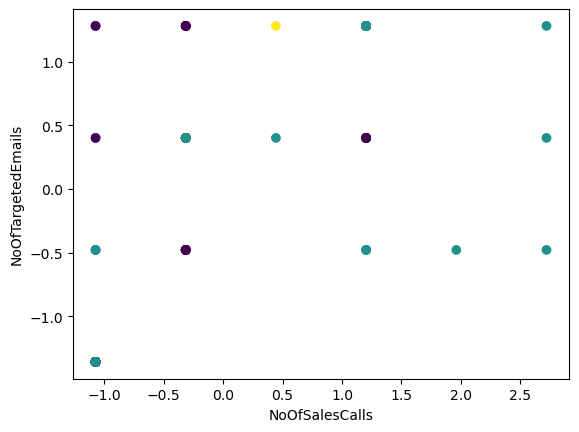

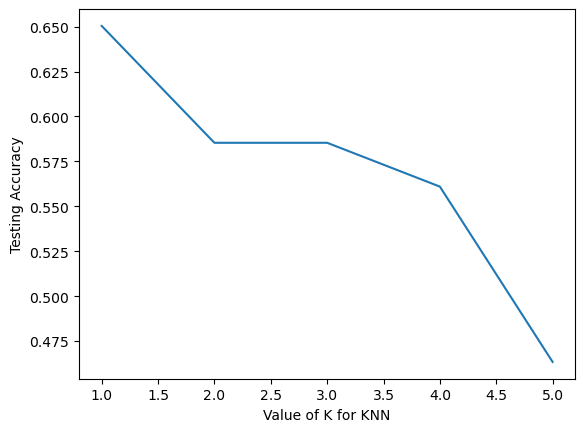

In [165]:

SalesOfMedicalDevices = "C:\\Users\\ajaal\\Downloads\\SalesOfMedicalDevices.xlsx"
df = pd.read_excel(SalesOfMedicalDevices)

X = df[['NoOfSalesCalls', 'NoOfTargetedEmails', 'NoOfSales','Customer']]
y = df["CustomerSatisfaction"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
k_values = range(1, 6)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for k={k}: {accuracy:.3f}')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.xlabel('NoOfSalesCalls')
plt.ylabel('NoOfTargetedEmails')
plt.show()

k_values = range(1, 6)
accuracy_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.plot(k_values, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()
def function_that_warns():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    function_that_warns() 

In [166]:
SalesOfMedicalDevices = "C:\\Users\\ajaal\\Downloads\\SalesOfMedicalDevices.xlsx"
df = pd.read_excel(SalesOfMedicalDevices)

X = df[['NoOfSalesCalls', 'NoOfTargetedEmails', 'Customer','year','NoOfSales']]
y = df["CustomerSatisfaction"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
k_values = range(1, 10)
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred.round())
    print(f'Accuracy for k={k}: {accuracy:.3f}')


Accuracy for k=1: 0.480
Accuracy for k=2: 0.439
Accuracy for k=3: 0.423
Accuracy for k=4: 0.407
Accuracy for k=5: 0.415
Accuracy for k=6: 0.341
Accuracy for k=7: 0.390
Accuracy for k=8: 0.398
Accuracy for k=9: 0.407
